<a href="https://colab.research.google.com/github/hagijakobson/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for Marketing Strategy

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Dataset

In [41]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [42]:
creditcard_df.shape

(8950, 18)

In [43]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [45]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [46]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [47]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [48]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Data Cleaning

### Dealing with missing values

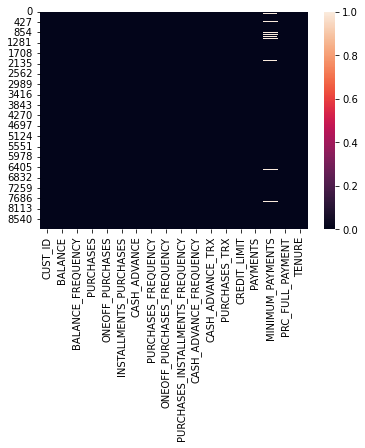

In [49]:
sns.heatmap(creditcard_df.isnull());

In [50]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [51]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [52]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [53]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [54]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [55]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

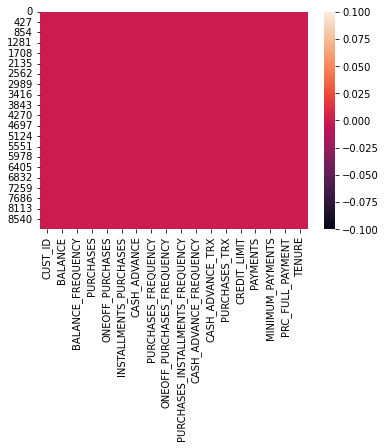

In [56]:
sns.heatmap(creditcard_df.isnull());

### Dealing with duplicate records

In [57]:
creditcard_df.duplicated().sum()

0

### Drop ID column

In [58]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [59]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [60]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [61]:
len(creditcard_df.columns)

17

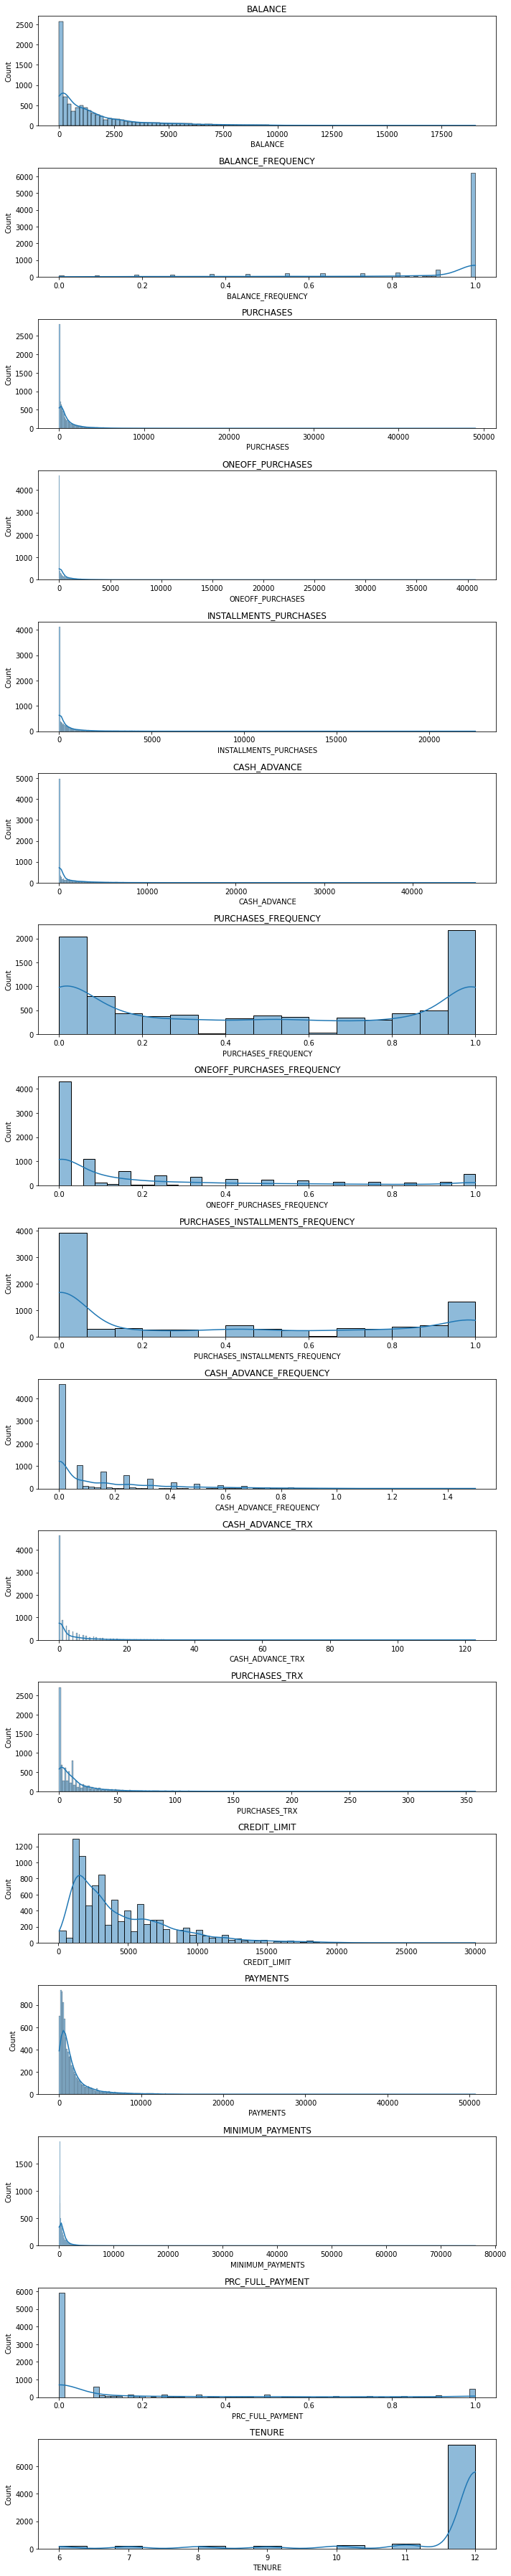

In [62]:
fig, axes = plt.subplots(17, 1,figsize=(10,50))
i = 0
for column in creditcard_df.columns:
    sns.histplot(data=creditcard_df, x=column, kde = True, ax=axes[i])
    axes[i].title.set_text(column)
    #plt.title(column)
    i+=1
plt.tight_layout();

In [63]:
correlations = creditcard_df.corr()

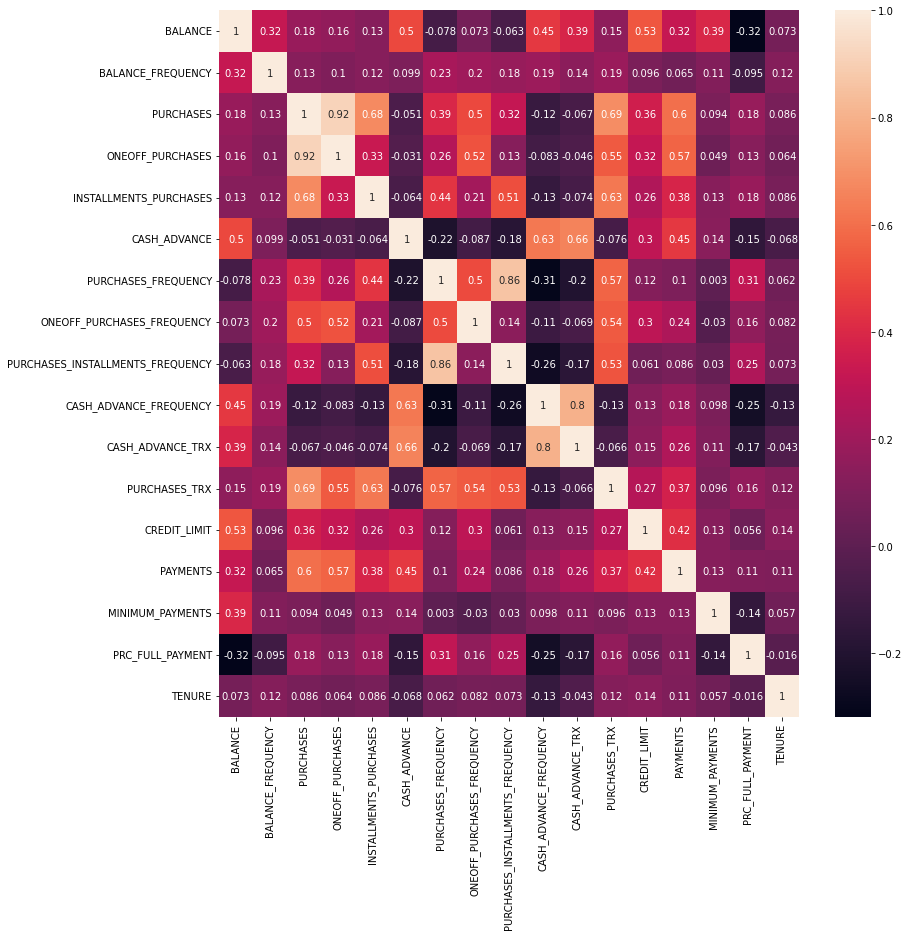

In [64]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlations, annot=True);

## Setting the number of clusters using the Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [65]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [66]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [67]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [68]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [69]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [70]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [71]:
print(wcss_1)

[152149.99999999983, 127784.87120454258, 111986.68834165644, 99074.3704938636, 91513.43273513645, 84852.47540636097, 79527.04338416774, 74494.7998285414, 71233.21620175008, 66455.26272571136, 63632.69575359198, 61386.896096012686, 59150.60329498141, 57499.04881763716, 55831.830145592845, 54562.91752157698, 52996.75073591528, 51749.5495218423, 50977.29728362742]


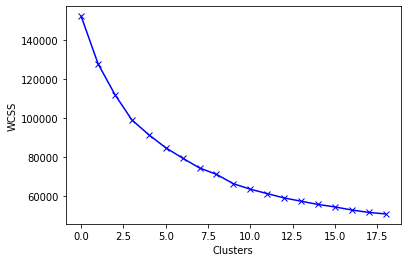

In [72]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## K-means clustering

In [73]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [74]:
labels, len(labels)

(array([0, 5, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [75]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2725,  419, 1103,   30, 1181,  866, 2004,  622]))

In [76]:
kmeans.cluster_centers_

array([[ 1.75009008e-02,  4.04138597e-01, -3.60931921e-01,
        -2.46615146e-01, -4.00231768e-01, -9.14094774e-02,
        -8.62999457e-01, -4.09340190e-01, -7.54767533e-01,
         1.08548905e-01, -2.53347968e-02, -4.85520863e-01,
        -3.03293058e-01, -2.50369191e-01, -4.52715765e-03,
        -4.56907742e-01,  2.72962310e-01],
       [ 9.19935407e-01,  4.67655287e-01,  2.25449078e+00,
         1.72111588e+00,  2.16875635e+00, -1.93345936e-01,
         1.16056707e+00,  1.55482581e+00,  1.24634100e+00,
        -3.09466958e-01, -2.09799089e-01,  2.78190077e+00,
         1.22524040e+00,  1.28391524e+00,  5.66182497e-01,
         2.88329286e-01,  3.34055749e-01],
       [-1.64645703e-01,  3.92184731e-01,  4.64074586e-01,
         6.06568529e-01, -1.72259354e-02, -3.33254944e-01,
         9.44601739e-01,  1.88056835e+00,  8.95739557e-02,
        -4.07610974e-01, -3.23012320e-01,  5.29272873e-01,
         3.80536913e-01,  9.42697275e-02, -1.62417442e-01,
         4.09324793e-01,  2.6

In [77]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.017501,0.404139,-0.360932,-0.246615,-0.400232,-0.091409,-0.862999,-0.409340,-0.754768,0.108549,-0.025335,-0.485521,-0.303293,-0.250369,-0.004527,-0.456908,0.272962
1,0.919935,0.467655,2.254491,1.721116,2.168756,-0.193346,1.160567,1.554826,1.246341,-0.309467,-0.209799,2.781901,1.225240,1.283915,0.566182,0.288329,0.334056
2,-0.164646,0.392185,0.464075,0.606569,-0.017226,-0.333255,0.944602,1.880568,0.089574,-0.407611,-0.323012,0.529273,0.380537,0.094270,-0.162417,0.409325,0.262269
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.701022,-2.142837,-0.311071,-0.235785,-0.302230,-0.322027,-0.556095,-0.444950,-0.439069,-0.520975,-0.376187,-0.419595,-0.175963,-0.201752,-0.256641,0.280867,0.199336
5,1.685975,0.391571,-0.219139,-0.157238,-0.229345,2.024465,-0.480967,-0.214711,-0.417038,1.925241,1.939404,-0.268226,1.026643,0.824336,0.510987,-0.391060,0.069031
6,-0.366721,0.332991,-0.037681,-0.244233,0.359418,-0.364672,0.994559,-0.387278,1.210230,-0.475810,-0.361797,0.188708,-0.263520,-0.217744,-0.045004,0.318728,0.256969
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [78]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1600.901475,0.973007,232.068221,183.106739,49.143023,787.181168,0.143987,0.080344,0.064473,0.156866,3.075935,2.641599,3390.945219,1008.349575,853.656192,0.020077,11.882612
1,3479.242725,0.988054,5819.959145,3449.137221,2372.247102,573.415653,0.956142,0.666292,0.859765,0.073217,1.817102,83.857482,8952.375297,5449.952679,2183.670969,0.238046,11.964371
2,1221.778694,0.970176,1994.707339,1599.216894,395.490445,280.019928,0.869465,0.763468,0.400036,0.053577,1.044505,27.865577,5878.998431,2006.045476,485.699546,0.273435,11.868302
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,105.356543,0.369652,338.597087,201.083235,137.765165,303.564554,0.267163,0.069720,0.189940,0.030892,0.681626,4.280271,3854.224762,1149.091856,266.114602,0.235863,11.784081
5,5073.689815,0.970030,535.010092,331.453741,203.673753,5224.268689,0.297315,0.138405,0.198696,0.520405,16.483834,8.042725,8229.797397,4119.517109,2055.041342,0.039336,11.609700
6,801.176783,0.956153,922.699765,187.060469,736.085267,214.136049,0.889515,0.086925,0.845414,0.039930,0.779830,19.400399,3535.656616,1102.795851,759.326383,0.246937,11.861208
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


In [79]:
labels, len(labels)

(array([0, 5, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [80]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


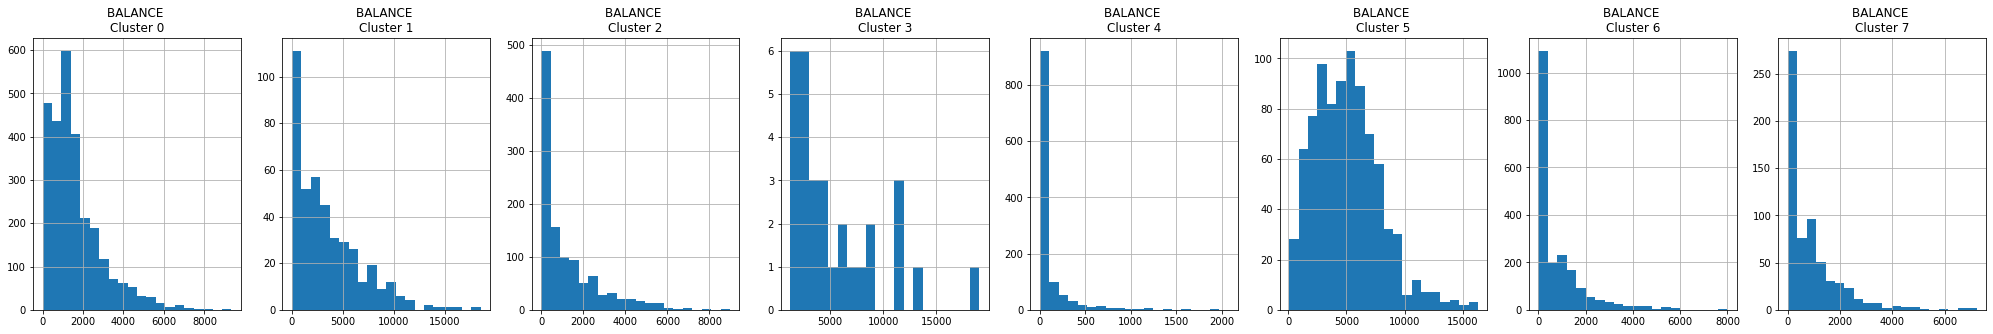

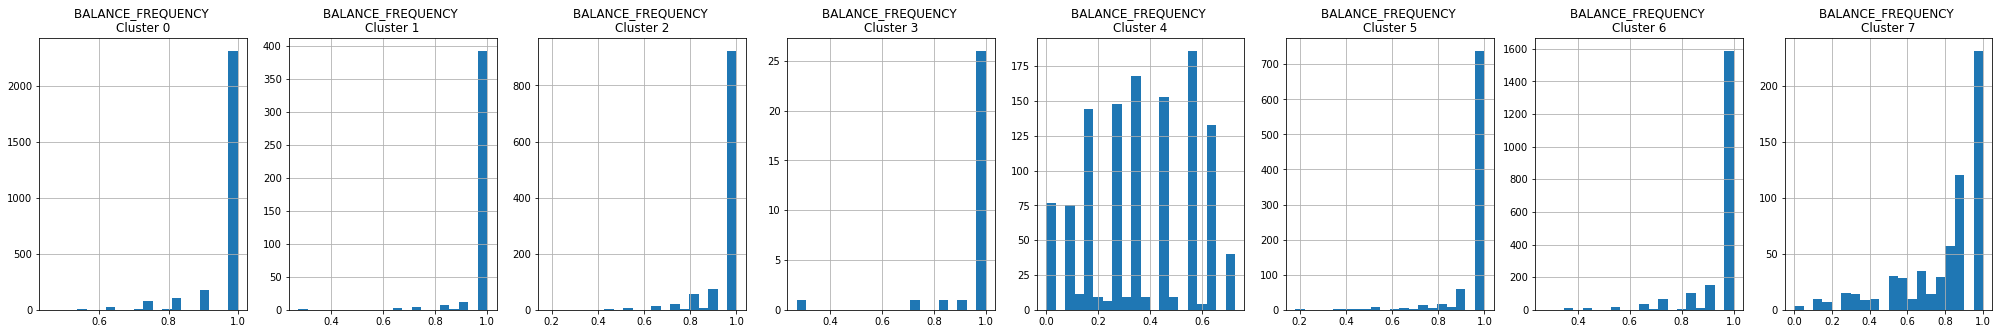

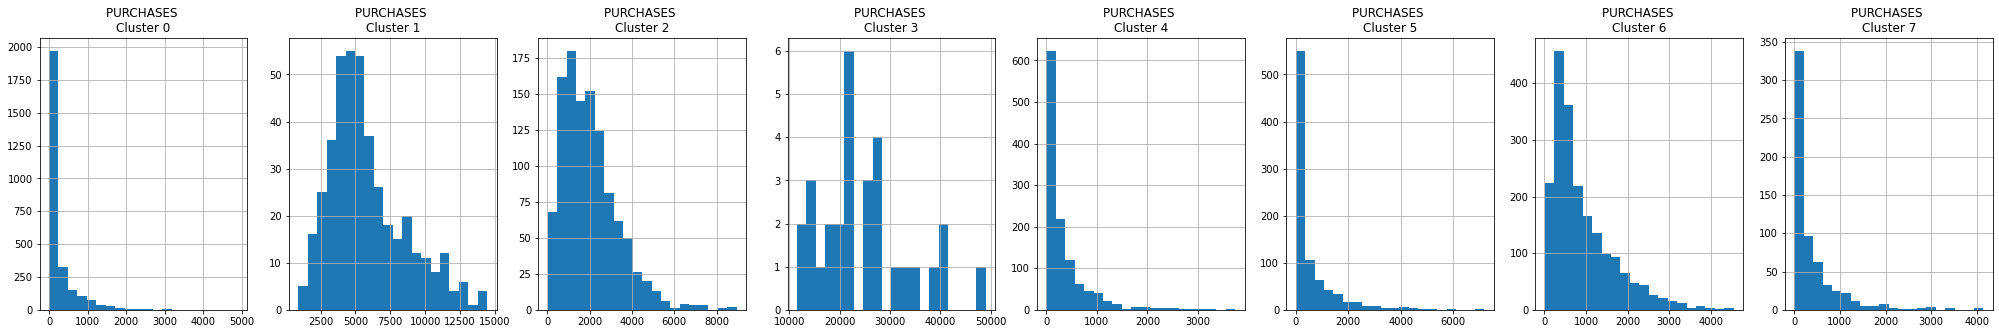

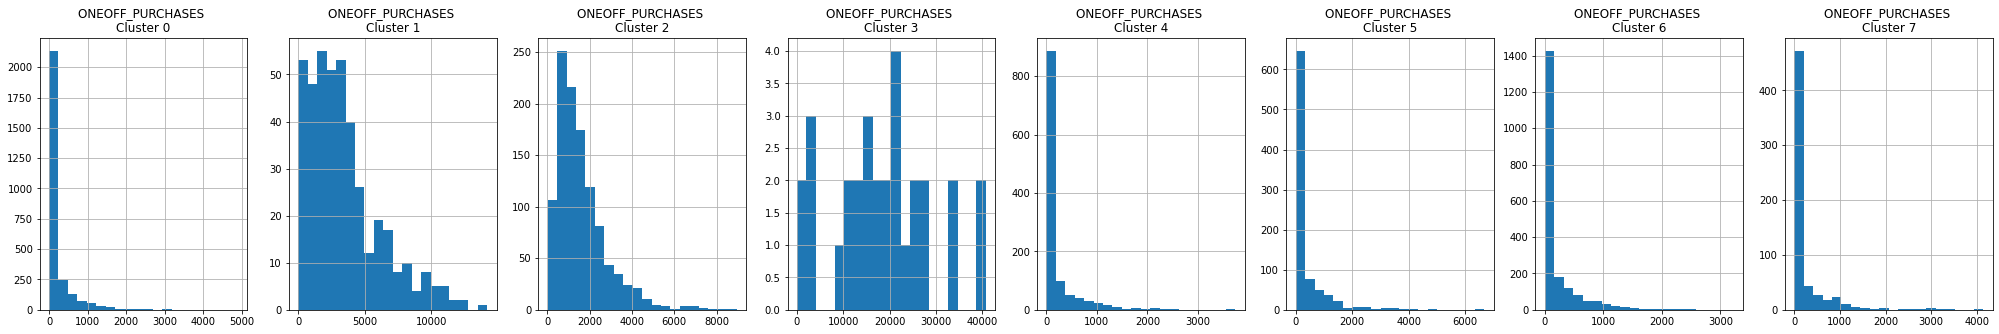

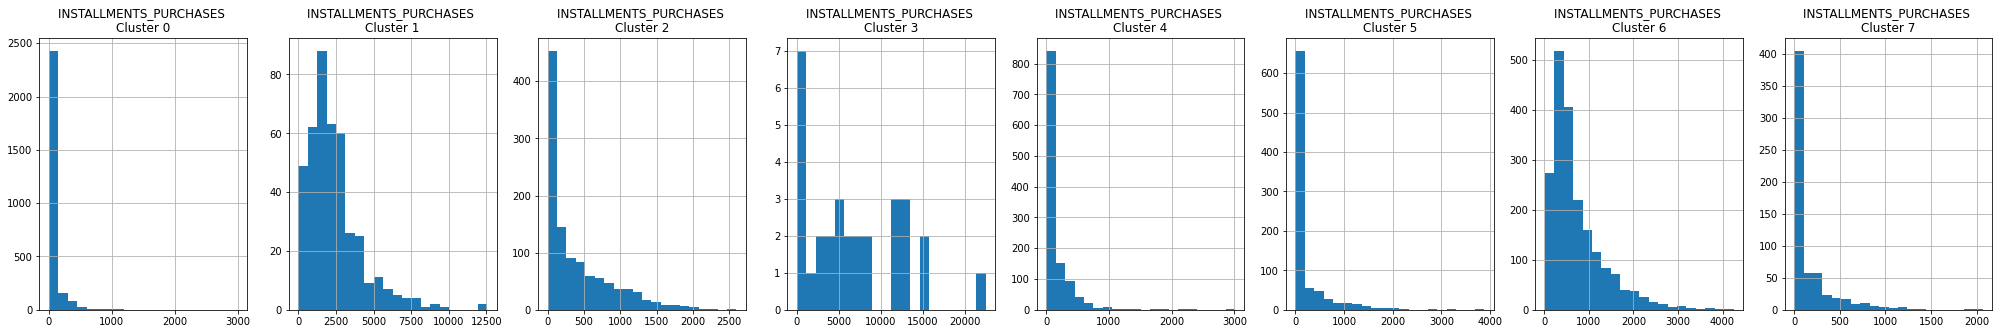

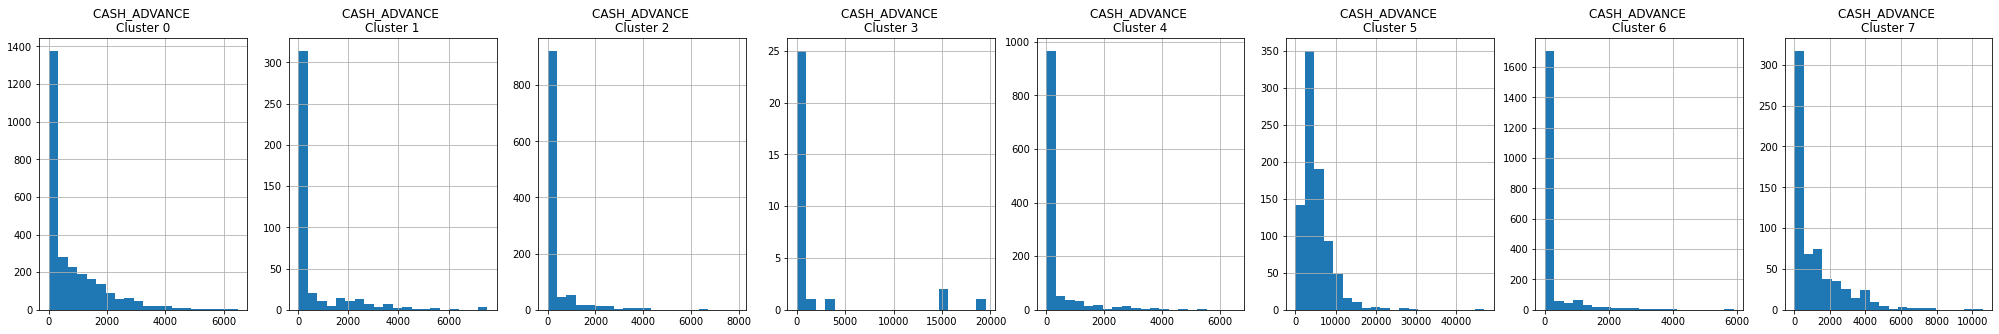

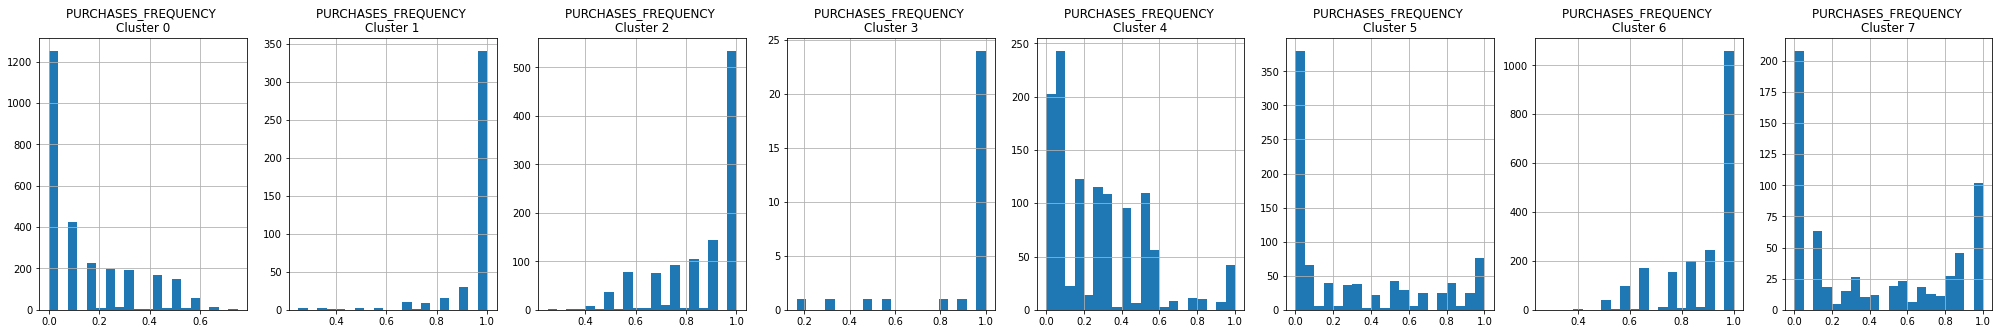

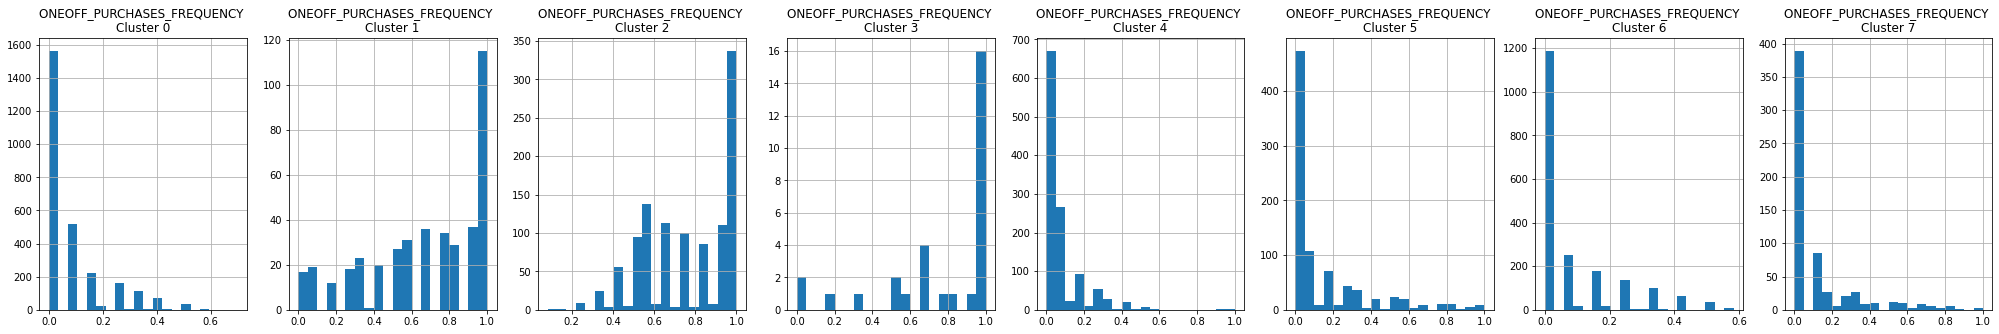

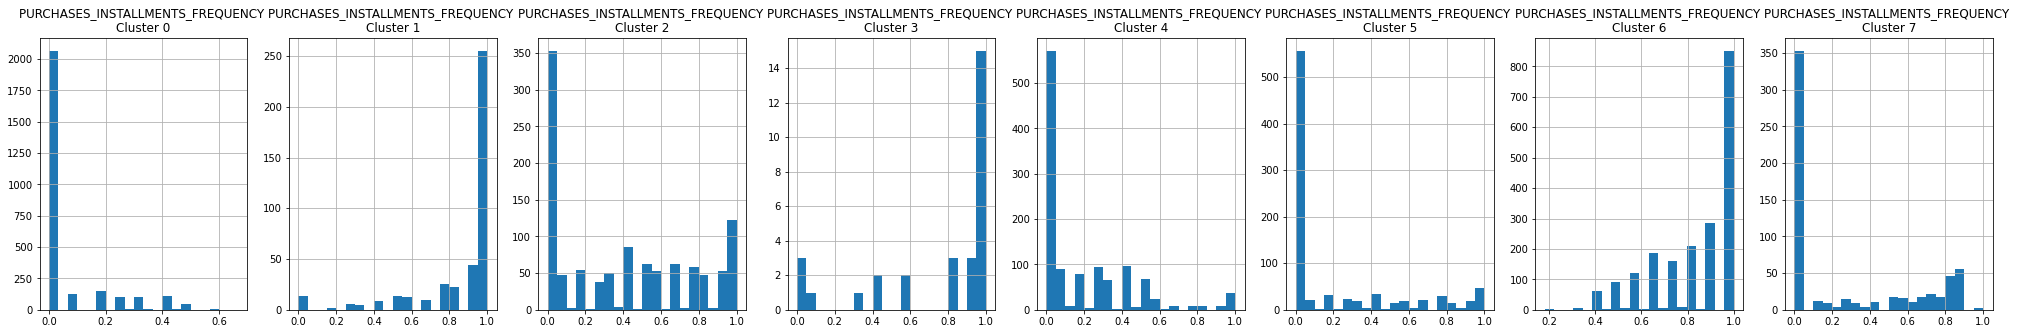

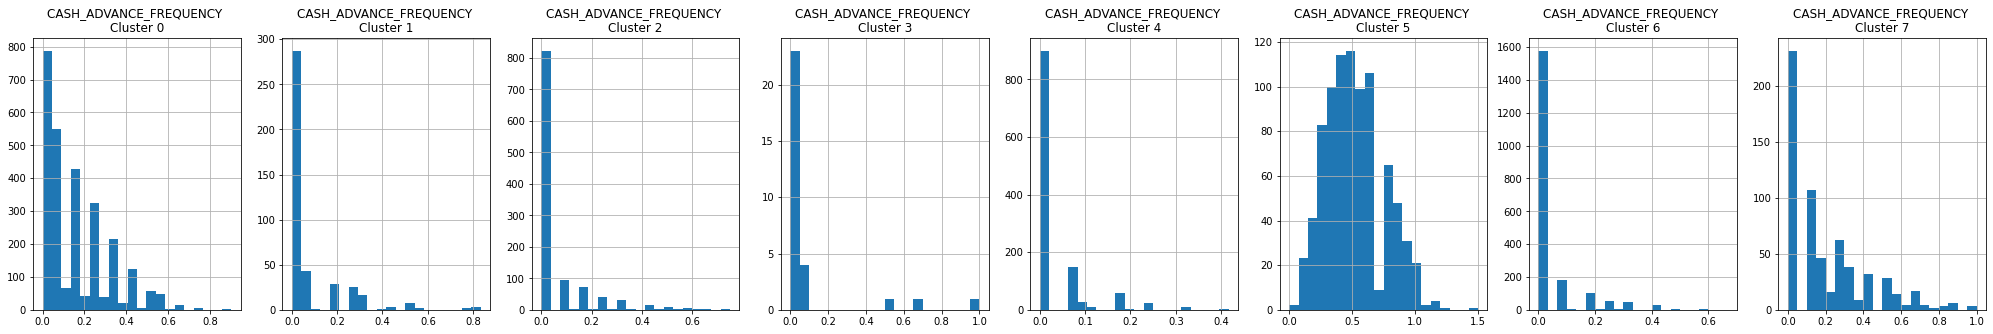

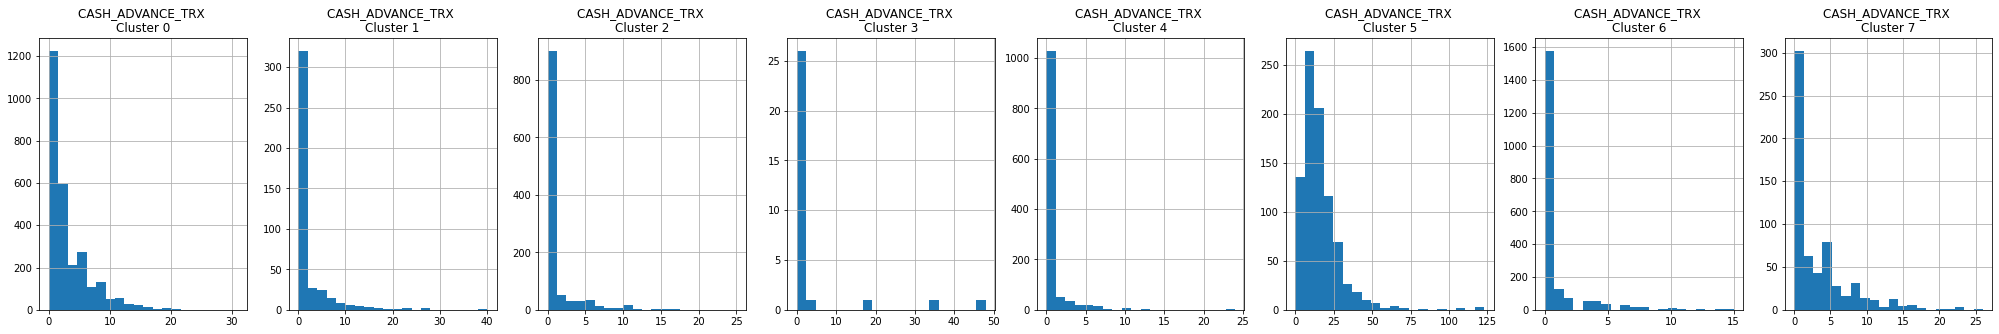

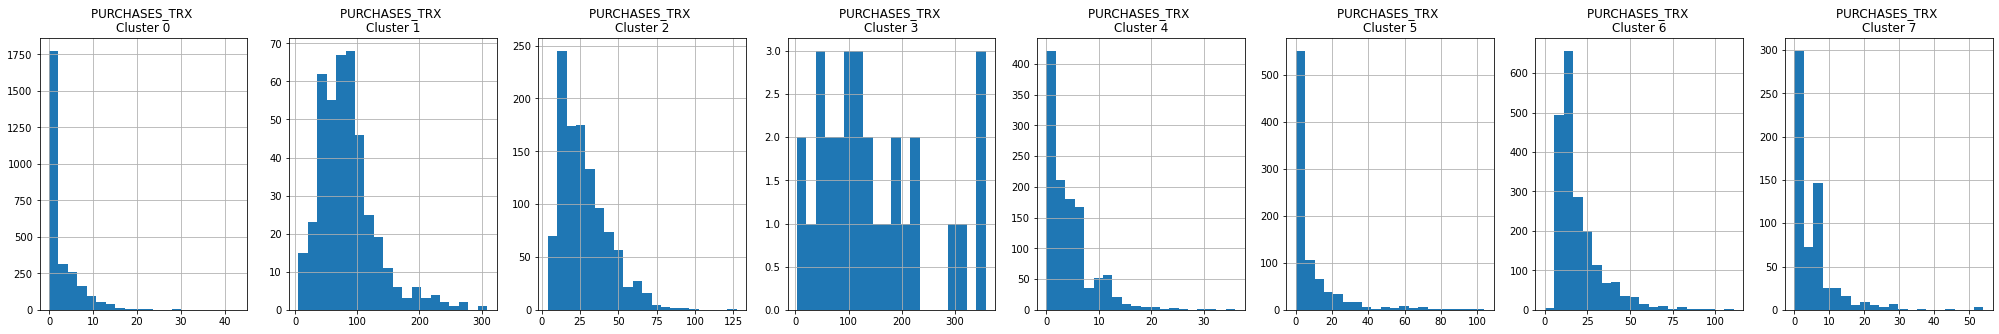

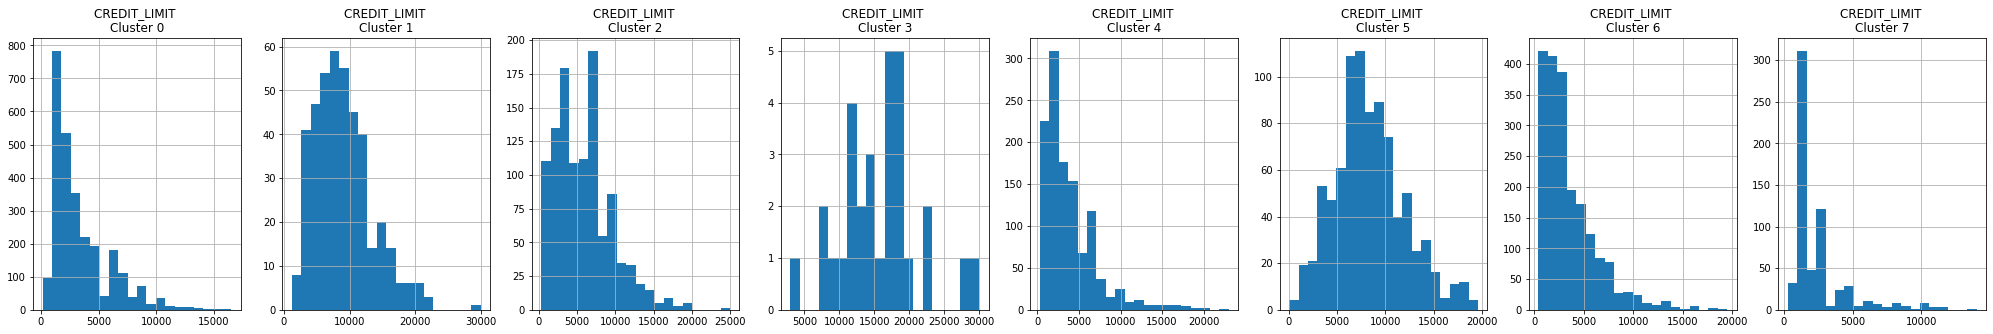

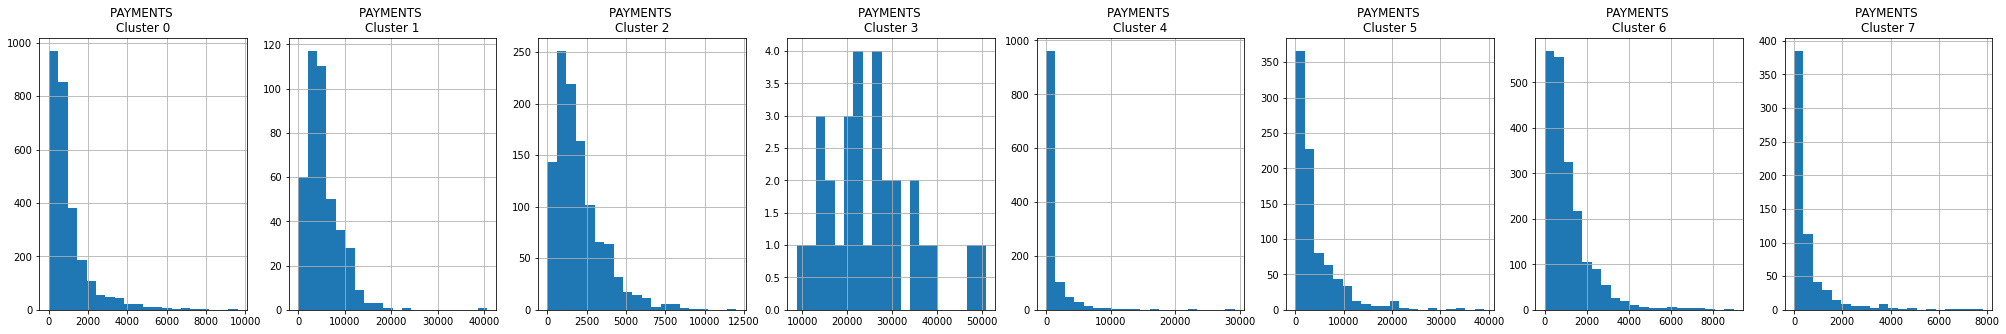

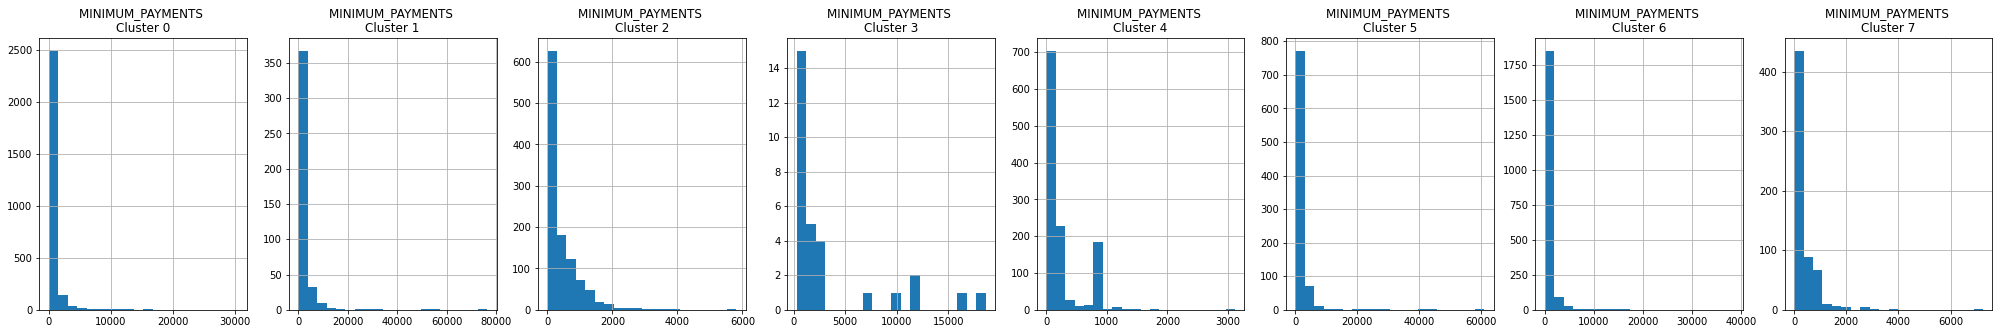

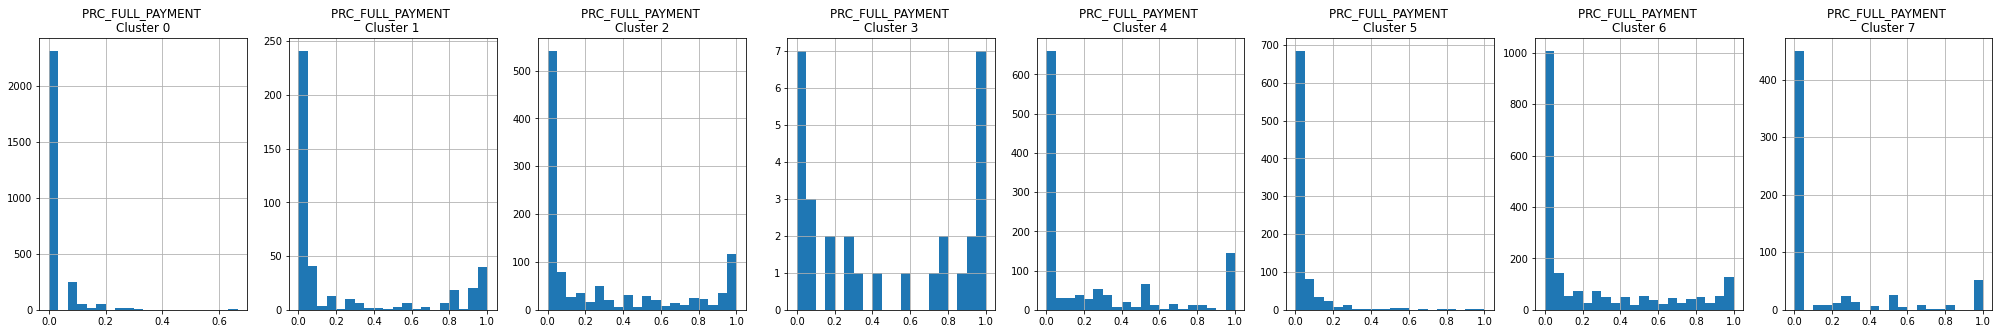

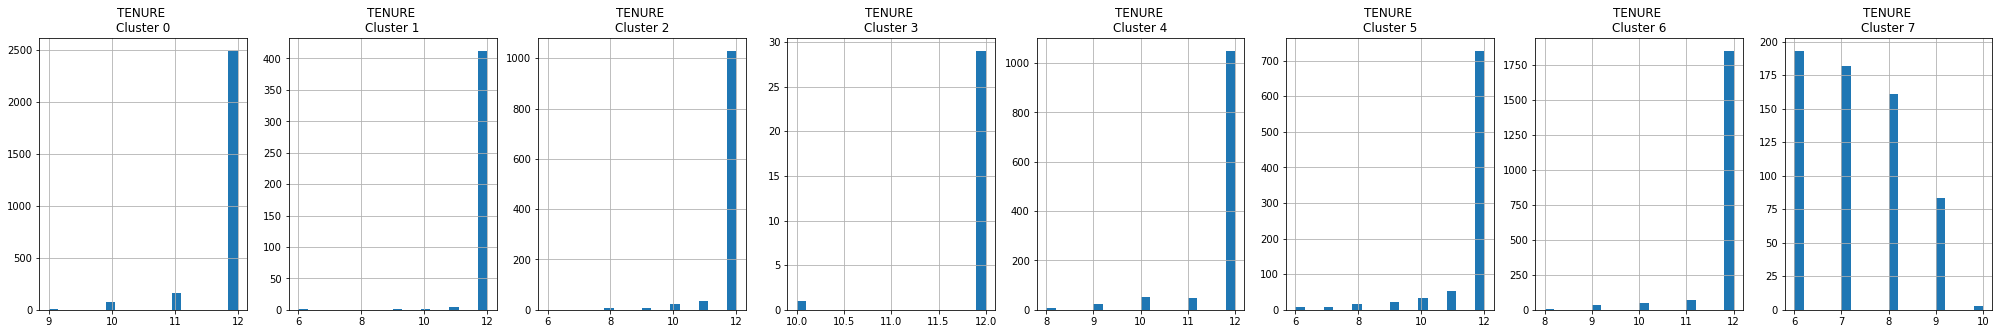

In [81]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [82]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4223,5543.972323,1.000000,0.00,0.00,0.0,2231.203315,0.000000,0.000000,0.000000,0.333333,9,0,6000.0,1265.310930,1978.268240,0.000000,12,0
4225,226.785380,1.000000,210.64,210.64,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,295.155445,176.886468,0.000000,12,0
4226,41.643083,1.000000,212.00,212.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,596.834019,47.139699,0.083333,12,0
4227,291.663664,1.000000,129.00,129.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,284.596786,200.845446,0.000000,12,0


In [83]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6092,37.765185,0.750000,158.64,0.00,158.64,0.000000,0.375000,0.000000,0.250,0.000000,0,3,1500.0,178.288853,66.521398,0.00,8,7
8311,1304.669711,1.000000,938.95,839.95,99.00,718.244077,0.875000,0.750000,0.625,0.250000,3,19,6000.0,397.559825,221.765960,0.00,8,7
3459,0.000000,0.000000,125.37,0.00,125.37,0.000000,1.000000,0.000000,1.000,0.000000,0,7,1500.0,0.000000,864.206542,0.00,7,7
3507,98.418953,0.555556,0.00,0.00,0.00,2327.566908,0.000000,0.000000,0.000,0.444444,15,0,1500.0,2535.544366,62.281239,0.25,9,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,7


In [84]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221956, -1.07645221],
       [-1.13829179,  2.50646767],
       [ 0.9696794 , -0.38348855],
       ...,
       [-0.92620378, -1.81078607],
       [-2.33655062, -0.65797757],
       [-0.55642385, -0.40046368]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138292,2.506468
2,0.969679,-0.383489
3,-0.873627,0.043165
4,-1.599433,-0.688582


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076452,1
1,-1.138292,2.506468,5
2,0.969679,-0.383489,2
3,-0.873627,0.043165,1
4,-1.599433,-0.688582,1


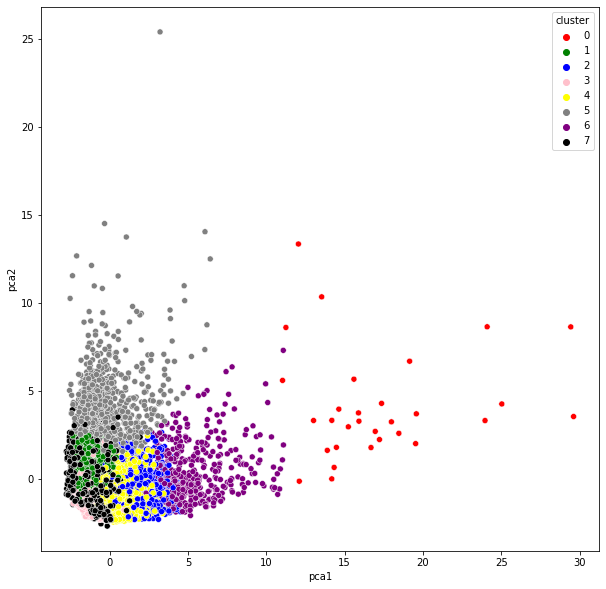

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [ ]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [ ]:
# encoder
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 6s 23ms/step - loss: 0.1877
Epoch 2/50
280/280 [==============================] - 6s 22ms/step - loss: 0.1119
Epoch 3/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0691
Epoch 4/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0362
Epoch 5/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0424
Epoch 6/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0473
Epoch 7/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0392
Epoch 8/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0487
Epoch 9/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0356
Epoch 10/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0270
Epoch 11/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0310
Epoch 12/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0255
Epoch 13/50
2

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

(8950, 10)

In [ ]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
compact[0]

array([0.        , 0.6033399 , 0.77557904, 1.7938616 , 0.        ,
       0.8507013 , 0.67095315, 0.3378452 , 0.28809083, 0.63638765],
      dtype=float32)

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

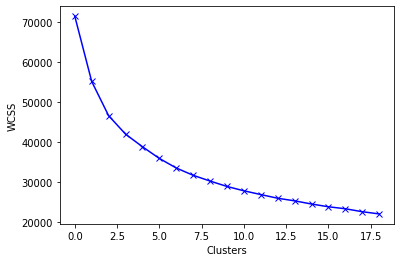

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

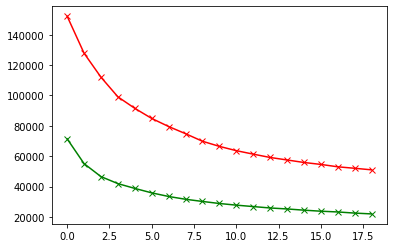

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 1, 1, ..., 2, 2, 2], dtype=int32), (8950,))

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.821048,-0.241919
1,0.394212,-1.073047
2,-1.860561,0.486894
3,0.129551,-0.059802
4,-0.874028,-0.169197


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.821048,-0.241919,1
1,0.394212,-1.073047,1
2,-1.860561,0.486894,1
3,0.129551,-0.059802,1
4,-0.874028,-0.169197,1


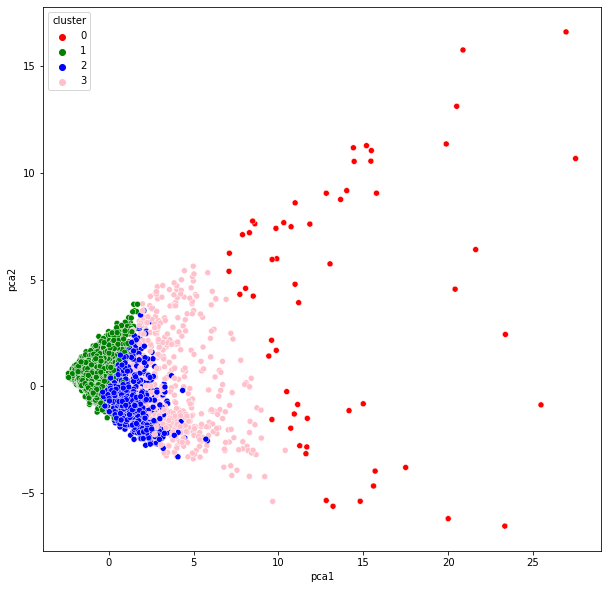

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1604,3391.702180,1.000000,38902.71,33803.84,5098.87,0.00000,1.000000,1.000000,1.000000,0.0,0,195,18000.0,35843.62593,716.027656,1.000000,12,0
2823,11642.601560,1.000000,15108.47,2370.00,12738.47,0.00000,1.000000,0.500000,1.000000,0.0,0,298,12000.0,16005.45204,11652.565110,0.000000,12,0
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.00000,0.166667,0.166667,0.000000,0.0,0,3,18000.0,50721.48336,1149.747342,0.000000,12,0
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.00000,1.000000,1.000000,0.583333,0.0,0,56,17000.0,17575.20083,2465.465414,0.166667,12,0
4515,6956.376540,1.000000,11500.94,3091.01,8409.93,15133.53213,1.000000,1.000000,1.000000,1.0,48,308,14000.0,20122.00545,1617.014574,0.166667,12,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5139,5861.100691,1.0,64.71,64.71,0.00,9799.529884,0.083333,0.083333,0.0,0.583333,35,2,9000.0,7371.459399,2791.366849,0.083333,12,3
6408,2184.965504,1.0,0.00,0.00,0.00,2893.023143,0.000000,0.000000,0.0,0.916667,26,0,8000.0,1730.364781,481.160634,0.000000,12,3
5134,2933.068755,1.0,0.00,0.00,0.00,7542.177658,0.000000,0.000000,0.0,0.833333,20,0,10000.0,2201.097670,612.068106,0.000000,12,3
2576,5097.916969,1.0,139.67,139.67,0.00,3365.390269,0.500000,0.500000,0.0,0.250000,22,6,6000.0,3313.162847,2759.803770,0.000000,12,3
2345,5925.120611,1.0,1763.89,258.43,1505.46,0.000000,1.000000,0.250000,1.0,0.000000,0,195,6500.0,2557.841292,2268.544117,0.000000,12,3


In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')